Task: Absolute Variance Analysis - Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# I defined IBCS color standards for consistent professional styling
IBCS_COLORS = {
    'actual_positive': '#70ad47',
    'actual_negative': '#c55a5a',
    'reference': '#a5a5a5',
    'forecast': '#1f4e79'
}

# I configured IBCS-compliant styling for all visualizations
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.spines.top': False,
    'axes.spines.right': False
})

data = pd.read_csv('Exersice Alpha Corporation.csv')
months = data['Month']
abs_variance = data['Abs_Variance (x Milion)']

print(f"\nData ready for visualization")
print(f"Months: {len(months)}")
print(f"Variance values: {len(abs_variance)}")


Data ready for visualization
Months: 24
Variance values: 24


Basic Statistics Overview

In [3]:
# I calculated key statistics to understand variance patterns
print("ALPHA CORPORATION VARIANCE ANALYSIS")
print("=" * 50)
print(f"Dataset: {len(data)} months analyzed")
print(f"Average variance: {abs_variance.mean():.1f}M EUR")
print(f"Range: {abs_variance.min():.1f}M to {abs_variance.max():.1f}M EUR")
print(f"Favorable months: {(abs_variance > 0).sum()}")
print(f"Unfavorable months: {(abs_variance < 0).sum()}")

ALPHA CORPORATION VARIANCE ANALYSIS
Dataset: 24 months analyzed
Average variance: 25.2M EUR
Range: -323.4M to 354.7M EUR
Favorable months: 13
Unfavorable months: 11


Task: Monthly Absolute Variance Bar Chart

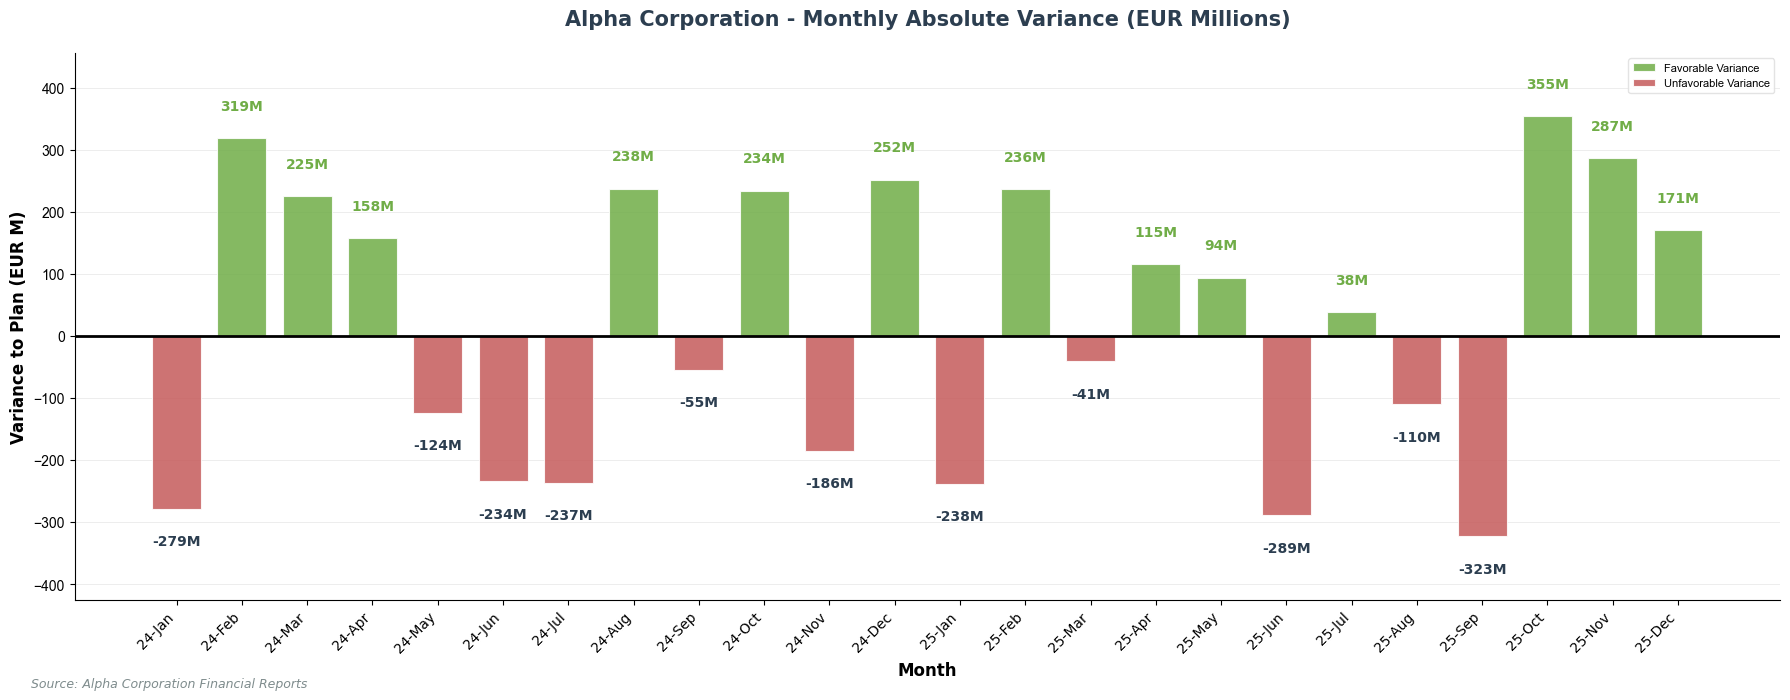

In [4]:
fig, ax = plt.subplots(figsize=(18, 7))

baseline = 0
colors = [IBCS_COLORS['actual_positive'] if x > 0 else IBCS_COLORS['actual_negative'] 
          for x in abs_variance]

bars = ax.bar(range(len(months)), abs_variance, color=colors, alpha=0.85, width=0.75, 
              edgecolor='white', linewidth=0.8)

ax.axhline(y=baseline, color='black', linewidth=2, zorder=3)

# I'm positioning labels OUTSIDE bars with significant spacing
y_range = max(abs_variance) - min(abs_variance)
offset = y_range * 0.06  # 6% offset from bar tops/bottoms

for i, (bar, value) in enumerate(zip(bars, abs_variance)):
    if value > 0:
        label_y = value + offset
        va = 'bottom'
        label_color = IBCS_COLORS['actual_positive']
    else:
        label_y = value - offset
        va = 'top'
        label_color = '#2c3e50'
    
    ax.text(i, label_y, f'{value:.0f}M', ha='center', va=va,
            fontsize=10, fontweight='600', color=label_color, family='sans-serif')

# Add padding to y-axis limits
y_min = min(abs_variance) - (y_range * 0.15)
y_max = max(abs_variance) + (y_range * 0.15)
ax.set_ylim(y_min, y_max)

ax.set_title('Alpha Corporation - Monthly Absolute Variance (EUR Millions)', 
             fontweight='600', fontsize=15, pad=20, color='#2c3e50', family='sans-serif')
ax.set_xlabel('Month', fontweight='600', fontsize=12, family='sans-serif')
ax.set_ylabel('Variance to Plan (EUR M)', fontweight='600', fontsize=12, family='sans-serif')
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, rotation=45, ha='right', fontsize=10, family='sans-serif')

ax.grid(axis='y', alpha=0.2, linewidth=0.5, color='gray', zorder=0)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=IBCS_COLORS['actual_positive'], alpha=0.85, edgecolor='white', linewidth=0.8),
    Patch(facecolor=IBCS_COLORS['actual_negative'], alpha=0.85, edgecolor='white', linewidth=0.8)
]
ax.legend(legend_elements, ['Favorable Variance', 'Unfavorable Variance'],
          loc='upper right', frameon=True, fontsize=8, framealpha=0.9, edgecolor='#e0e0e0')

fig.text(0.02, 0.01, 'Source: Alpha Corporation Financial Reports', 
         fontsize=9, style='italic', color='#7f8c8d', family='sans-serif')

plt.tight_layout()
plt.show()
